<a href="https://colab.research.google.com/github/SushSushmithagowda/ML-101-projects/blob/main/TripAlly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
%%writefile content.json
{"intents": [
    {"tag": "greeting",
     "patterns": ["Hi", "Hey", "Is anyone there?", "Hello", "Hay"],
     "responses": ["Hello", "Hi", "Hi there"]
    },
    {"tag": "goodbye",
     "patterns": ["Bye", "See you later", "Goodbye"],
     "responses": ["See you later", "Have a nice day", "Bye! Come back again"]
    },
    {"tag": "thanks",
     "patterns": ["Thanks", "Thank you", "That's helpful", "Thanks for the help"],
     "responses": ["Happy to help!", "Any time!", "My pleasure", "You're most welcome!"]
    },
    {"tag": "about",
     "patterns": ["Who are you?", "What are you?", "Who you are?" ],
     "responses": ["I.m TripAlly, your bot assistant", "I'm TripAlly, an Artificial Intelligent bot"]
    },
    {"tag": "name",
    "patterns": ["what is your name", "what should I call you", "whats your name?"],
    "responses": ["You can call me TripAlly.", "I'm TripAlly!", "Just call me as Trips"]
    },
    {"tag": "help",
    "patterns": ["Could you help me?", "give me a hand please", "Can you help?", "What can you do for me?", "I need a help"],
    "responses": ["Tell me how can assist you", "Yes Sure, How can I support you"]
    },
    {"tag": "togo",
    "patterns": ["I am planning for a weekend trip", "I would like to go on a trip", "I want a break", "I would like to get away for the weekend", "I want to go out"],
    "responses": ["Sure, I'll help you with that! Tell me, how do you want your vacation to be like? eg:budget-friendly"]
    },
    {"tag": "budget",
    "patterns": ["In the range 200$", "In the range 500$", "About 1000$", "More than 1000$", "Budget-friendly","lavish and luxurious"],
    "responses": ["Awesome!, here is the list of beautiful spots you can explore based on budgets :)1. In the range 200$ - https://www.thetravel.com/20-usa-cities-where-we-can-have-epic-weekend-getaways-for-under-200/2. In the range 500$ -https://www.familyvacationcritic.com/7-great-escapes-for-under-500/art/3. In the range 1000$ -https://www.travelocity.com/inspire/8-weekend-getaways-for-under-1000/4.Lavish trip - https://vacationidea.com/weekend_getaways/weekend_trips.html"]
    }
    ]
}

Overwriting content.json


In [ ]:
with open('content.json') as file:
    data = json.load(file)

In [ ]:
tags = []
patterns = []
responses={}
for intent in data['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    patterns.append(lines)
    tags.append(intent['tag'])

In [ ]:
data1 = pd.DataFrame({"patterns":patterns,
"tags":tags})

In [ ]:
data1

,patterns,tags
0,Hi,greeting
1,Hey,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Hay,greeting
5,Bye,goodbye
6,See you later,goodbye
7,Goodbye,goodbye
8,Thanks,thanks
9,Thank you,thanks


In [ ]:
#preprocessing
#removingpunctuations
import string
data1['patterns'] = data1['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data1['patterns'] = data1['patterns'].apply(lambda wrd: ''.join(wrd))
data1

,patterns,tags
0,hi,greeting
1,hey,greeting
2,is anyone there,greeting
3,hello,greeting
4,hay,greeting
5,bye,goodbye
6,see you later,goodbye
7,goodbye,goodbye
8,thanks,thanks
9,thank you,thanks


In [ ]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data1['patterns'])
train = tokenizer.texts_to_sequences(data1['patterns'])

#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data1['tags'])


In [ ]:
input_shape = x_train.shape[1]

In [ ]:
print(input_shape)

9


In [ ]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words: ", vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words:  63
output length:  8


In [ ]:
#creating the model
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)

In [ ]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
2/2 [==============================] - 2s 11ms/step - loss: 2.0816 - accuracy: 0.1176
Epoch 2/200
2/2 [==============================] - 0s 11ms/step - loss: 2.0793 - accuracy: 0.1471
Epoch 3/200
2/2 [==============================] - 0s 10ms/step - loss: 2.0775 - accuracy: 0.1765
Epoch 4/200
2/2 [==============================] - 0s 11ms/step - loss: 2.0758 - accuracy: 0.1765
Epoch 5/200
2/2 [==============================] - 0s 11ms/step - loss: 2.0743 - accuracy: 0.1471
Epoch 6/200
2/2 [==============================] - 0s 11ms/step - loss: 2.0729 - accuracy: 0.1471
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 2.0716 - accuracy: 0.1471
Epoch 8/200
2/2 [==============================] - 0s 11ms/step - loss: 2.0706 - accuracy: 0.1471
Epoch 9/200
2/2 [==============================] - 0s 10ms/step - loss: 2.0696 - accuracy: 0.1471
Epoch 10/200
2/2 [==============================] - 0s 10ms/step - loss: 2.0689 - accuracy: 0.1471
Epoch 11/200
2/2 [==

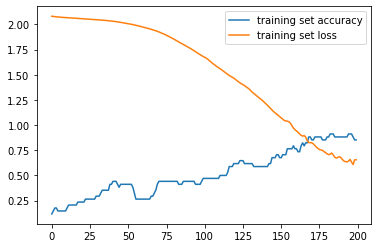

In [ ]:
#model analysis
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [ ]:
#testing
import random
while True:
  texts_p = []
  prediction_input = input('You: ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding 
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input], input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("TripAlly : ",random.choice(responses[response_tag]))
  

You: Manohar
TripAlly :  Hello
You: How are you doing?
TripAlly :  Yes Sure, How can I support you
You: I wanted help to finding a vacation spot
TripAlly :  Tell me how can assist you
You: Find me a place
TripAlly :  Hello
You: Find me a room
TripAlly :  Hi there
You: I want to go out
TripAlly :  Sure, I'll help you with that! Tell me, how do you want your vacation to be like? eg:budget-friendly
You: lavish
TripAlly :  Hi there
You: budget friendly
TripAlly :  Hi
You: I want to go out
TripAlly :  Sure, I'll help you with that! Tell me, how do you want your vacation to be like? eg:budget-friendly
You: budget friendly
TripAlly :  Hi
You: budget-friendly
TripAlly :  Awesome!, here is the list of beautiful spots you can explore based on budgets :)1. In the range 200$ - https://www.thetravel.com/20-usa-cities-where-we-can-have-epic-weekend-getaways-for-under-200/2. In the range 500$ -https://www.familyvacationcritic.com/7-great-escapes-for-under-500/art/3. In the range 1000$ -https://www.tr

KeyboardInterrupt: ignored